In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import torch
import torchvision.transforms as T
import sal_ssim

plt.rcParams["figure.figsize"] = (5, 5)

from piq import psnr, ssim

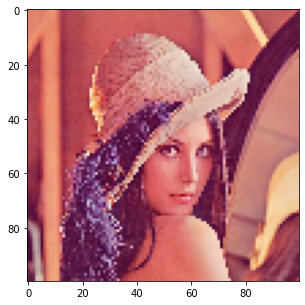

In [2]:
lena = plt.imread('lena.png')
lena = cv2.resize(lena, (100, 100))
plt.imshow(lena)
plt.show()

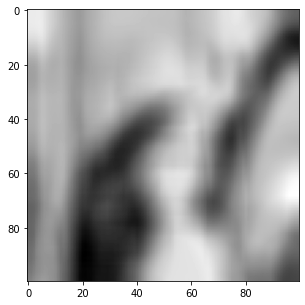

In [3]:
mask = lena[..., 0]
mask = cv.blur(mask, (14, 14))
mask = (mask - mask.min())/ (mask.max() - mask.min())
plt.imshow(mask, cmap='gray')
plt.show()

In [4]:
def np2pt(arr):
    return torch.unsqueeze(T.ToTensor()(arr), 0)

In [5]:
def test_ssim(ref, dis, mask):
    ref = np2pt(ref)
    dis = np2pt(dis)
    mask = np2pt(mask)
    mask = torch.concat([mask.clone()] * 3, dim=1)
    return sal_ssim.ssim(ref, dis, mask)


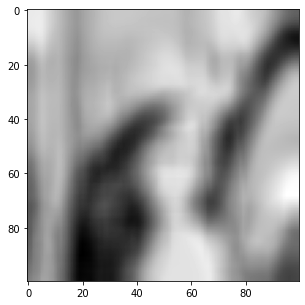

tensor(0.3869)

In [6]:
mask_blur = 13
im_blur = 10

mask = lena[..., 0]
mask = cv.blur(mask, (mask_blur, mask_blur))
mask = (mask - mask.min())/ (mask.max() - mask.min())
plt.imshow(mask, cmap='gray')
plt.show()

test_ssim(lena, cv.blur(lena, (im_blur, im_blur)), mask)


In [50]:
mask_blur_vals = range(1, 20, 2)
im_blur_vals = range(1, 20, 2)

mask_blur_vals, im_blur_vals = np.meshgrid(mask_blur_vals, im_blur_vals)

In [38]:
def f(mask_blur, im_blur):
    mask = lena[..., 0]
    mask = cv.blur(mask, (mask_blur, mask_blur))
    mask = (mask - mask.min()) / (mask.max() - mask.min())

    return test_ssim(lena, cv.blur(lena, (im_blur, im_blur)), mask)

In [39]:
f_vec = np.vectorize(f)

In [44]:
vals = f_vec(mask_blur_vals, im_blur_vals)

RuntimeError: Error in qhull Delaunay triangulation calculation: input inconsistency (exitcode=1); use python verbose option (-v) to see original qhull error.

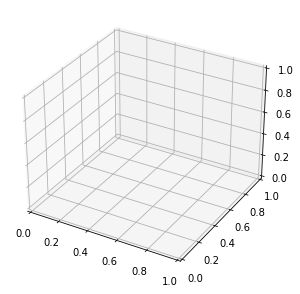

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(mask_blur_vals.flatten(), im_blur_vals.flatten(), vals.flatten())
ax.set_xlabel('mask')
ax.set_ylabel('im')

ax.view_init(0, 90)

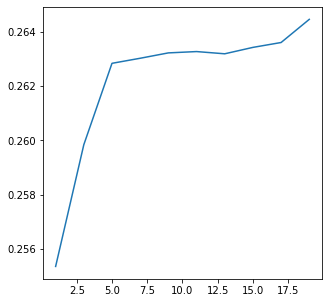

In [54]:
mask_blur_vals = range(1, 20, 2)
im_blur_vals = range(19, 20, 2)

mask_blur_vals, im_blur_vals = np.meshgrid(mask_blur_vals, im_blur_vals)
vals = f_vec(mask_blur_vals, im_blur_vals)

plt.plot(mask_blur_vals.flatten(), vals.flatten())